In [1]:
import MDAnalysis as mda
import prolif as plf

top_file = "md_0_10.gro"
traj_file = "md_0_10.xtc"

# load topology and trajectory
u = mda.Universe(top_file, traj_file)

print(hasattr(u.atoms,'elements'))

u.guess_TopologyAttrs(to_guess=['elements'])

print(u.atoms,'elements')

# create selections for the ligand and protein
ligand_selection = u.select_atoms("resname PET")
protein_selection = u.select_atoms("protein")

ligand_selection.guess_bonds()
protein_selection.guess_bonds()

ligand_selection, protein_selection

c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\topology\tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)


False
<AtomGroup [<Atom 1: N of type N of resname ALA, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname ALA, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname ALA, resid 1 and segid SYSTEM>, ..., <Atom 168041: OW of type O of resname SOL, resid 55492 and segid SYSTEM>, <Atom 168042: HW1 of type H of resname SOL, resid 55492 and segid SYSTEM>, <Atom 168043: HW2 of type H of resname SOL, resid 55492 and segid SYSTEM>]> elements


(<AtomGroup with 47 atoms>, <AtomGroup with 2195 atoms>)

In [4]:
print(type(ligand_selection))


<class 'MDAnalysis.core.groups.AtomGroup'>


c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppD

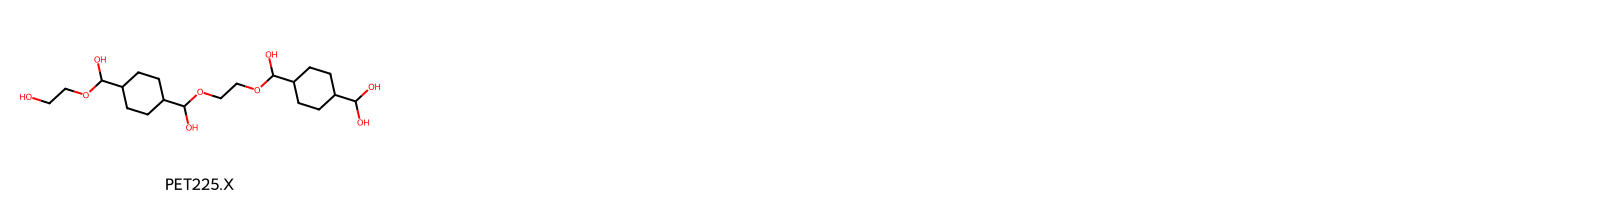

In [6]:
ligand_selection.write('ligand.pdb')


from rdkit import Chem
ligand_mol = Chem.MolFromPDBFile('ligand.pdb')


ligand_mol = plf.Molecule(ligand_mol)
plf.display_residues(ligand_mol,size=(400,200))


c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
c:\Users\24548\AppD

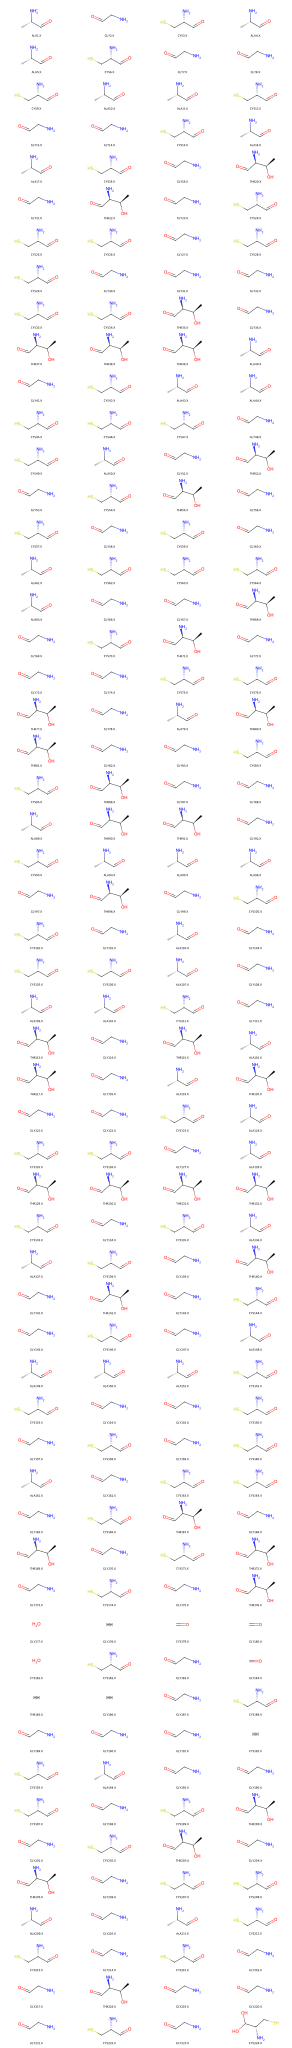

In [8]:
protein_selection.write('protein.pdb')

from rdkit import Chem
protein_mol = Chem.MolFromPDBFile('protein.pdb')

protein_mol = plf.Molecule(protein_mol)
plf.display_residues(protein_mol, size=(400, 200))


In [9]:
plf.Fingerprint.list_available()

['Anionic',
 'CationPi',
 'Cationic',
 'EdgeToFace',
 'FaceToFace',
 'HBAcceptor',
 'HBDonor',
 'Hydrophobic',
 'MetalAcceptor',
 'MetalDonor',
 'PiCation',
 'PiStacking',
 'VdWContact',
 'XBAcceptor',
 'XBDonor']

In [10]:
# use default interactions
fp = plf.Fingerprint()
# run on a slice of the trajectory frames: from begining to end with a step of 10
fp.run(u.trajectory[::10], ligand_selection, protein_selection)

  0%|          | 0/101 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBAcceptor', 'HBDonor', 'Cationic', 'Anionic', 'CationPi', 'PiCation', 'PiStacking', 'VdWContact'] at 0x2d146ae2390>

In [11]:
fp.to_pickle("fingerprint.pkl")
fp = plf.Fingerprint.from_pickle("fingerprint.pkl")

In [12]:
df=fp.to_dataframe()
df.head(10)

ligand          PET225                                               \
protein          ALA44      CYS47       THR68                 GLY69   
interaction VdWContact VdWContact Hydrophobic VdWContact HBAcceptor   
Frame                                                                 
0                False      False       False      False      False   
10               False      False       False      False      False   
20               False      False       False      False      False   
30               False      False       False      False      False   
40               False      False        True       True      False   
50               False      False       False       True      False   
60               False      False       False      False      False   
70               False      False       False      False      False   
80               False      False       False      False      False   
90               False      False       False      False      False   

ligand                                                                ...  \
protein                      CYS70                             THR71  ...   
interaction VdWContact Hydrophobic HBAcceptor VdWContact Hydrophobic  ...   
Frame                                                                 ...   
0                False       False      False       True       False  ...   
10               False       False      False      False       False  ...   
20               False       False      False      False       False  ...   
30               False       False      False      False       False  ...   
40               False       False      False      False       False  ...   
50                True        True       True       True       False  ...   
60               False       False      False      False       False  ...   
70               False       False      False       True       False  ...   
80               False       False      False      False       False  ...   
90               False       False      False      False       False  ...   

ligand                                                                        \
protein          ALA94       THR98                         CYS101              
interaction VdWContact Hydrophobic HBDonor VdWContact Hydrophobic VdWContact   
Frame                                                                          
0                False       False   False      False       False      False   
10                True       False   False      False       False      False   
20                True       False   False      False       False      False   
30               False       False   False      False       False      False   
40               False       False   False      False       False       True   
50               False       False   False      False       False       True   
60               False       False   False      False       False      False   
70               False       False   False      False       False      False   
80                True       False   False      False       False      False   
90                True       False   False      False       False       True   

ligand                                                 
protein      ALA128                 THR129             
interaction HBDonor VdWContact Hydrophobic VdWContact  
Frame                                                  
0             False      False       False      False  
10            False      False       False      False  
20            False      False       False      False  
30            False      False       False      False  
40            False      False       False      False  
50            False      False       False      False  
60            False      False       False      False  
70            False      False       False      False  
80            False      False       False      False  
90            False      False       False      False  

[10 rows x 68 column

<Axes: xlabel='Frame'>

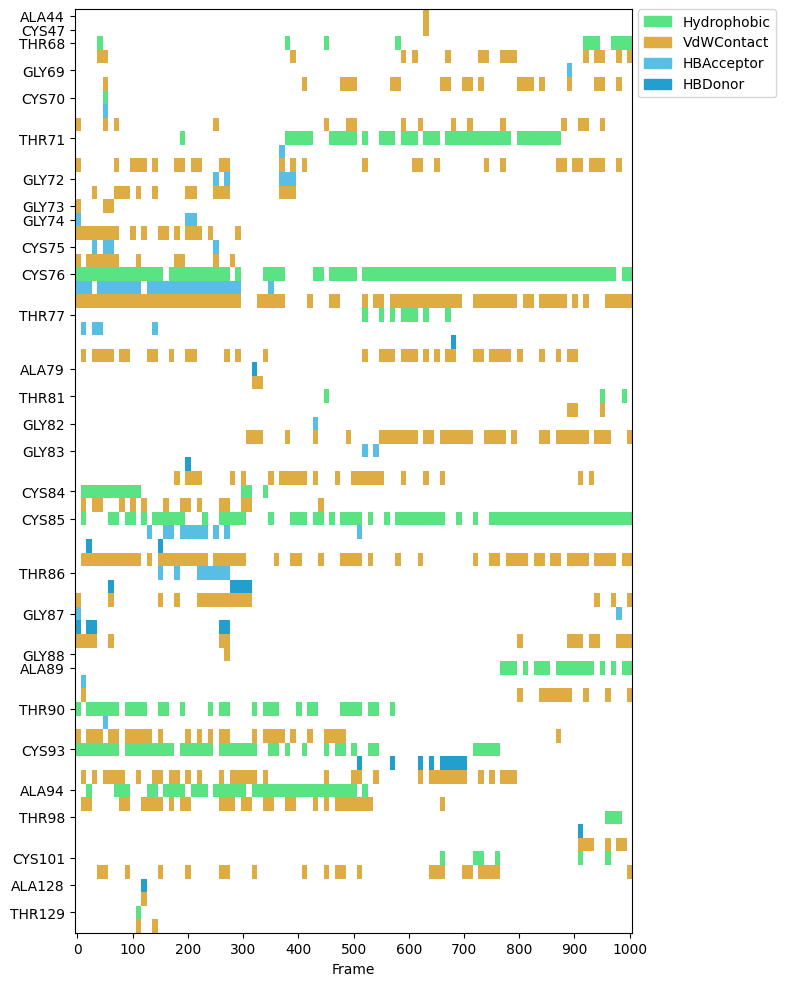

In [13]:
# %matplotlib ipympl

fp.plot_barcode()

In [15]:
# Tanimoto similarity between the first frame and the rest
from rdkit import DataStructs

bitvectors = fp.to_bitvectors()
tanimoto_sims = DataStructs.BulkTanimotoSimilarity(bitvectors[0], bitvectors)
tanimoto_sims

[1.0,
 0.23076923076923078,
 0.47619047619047616,
 0.375,
 0.3333333333333333,
 0.3333333333333333,
 0.4782608695652174,
 0.45454545454545453,
 0.125,
 0.25,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.23809523809523808,
 0.20833333333333334,
 0.34782608695652173,
 0.23809523809523808,
 0.17391304347826086,
 0.3181818181818182,
 0.30434782608695654,
 0.2692307692307692,
 0.3181818181818182,
 0.34782608695652173,
 0.23809523809523808,
 0.47058823529411764,
 0.2608695652173913,
 0.4,
 0.35714285714285715,
 0.21739130434782608,
 0.2727272727272727,
 0.08,
 0.09090909090909091,
 0.13636363636363635,
 0.05263157894736842,
 0.19047619047619047,
 0.3,
 0.2777777777777778,
 0.19047619047619047,
 0.041666666666666664,
 0.08,
 0.047619047619047616,
 0.09090909090909091,
 0.16666666666666666,
 0.09090909090909091,
 0.05,
 0.13636363636363635,
 0.15789473684210525,
 0.19047619047619047,
 0.17391304347826086,
 0.13043478260869565,
 0.16666666666666666,
 0.041666666666666664,
 0.130434782608

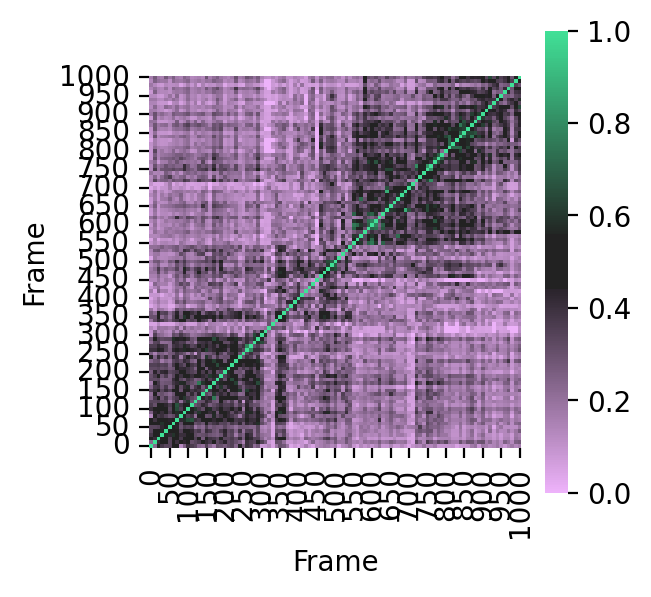

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Tanimoto similarity matrix
bitvectors = fp.to_bitvectors()
similarity_matrix = []
for bv in bitvectors:
    similarity_matrix.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors))
similarity_matrix = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# display heatmap
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
colormap = sns.diverging_palette(
    300, 145, s=90, l=80, sep=30, center="dark", as_cmap=True
)
sns.heatmap(
    similarity_matrix,
    ax=ax,
    square=True,
    cmap=colormap,
    vmin=0,
    vmax=1,
    center=0.5,
    xticklabels=5,
    yticklabels=5,
)
ax.invert_yaxis()
plt.yticks(rotation="horizontal")
fig.patch.set_facecolor("white")

In [17]:
view = fp.plot_lignetwork(ligand_mol)
view

In [19]:
view = fp.plot_lignetwork(ligand_mol, threshold=0.0)
view

In [20]:
fp_count = plf.Fingerprint(count=True)
fp_count.run(u.trajectory[0:1], ligand_selection, protein_selection)
view = fp_count.plot_lignetwork(ligand_mol, kind="frame", frame=0, display_all=True)
view

  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
frame = 0
# seek specific frame
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
# display
view = fp_count.plot_3d(ligand_mol, protein_mol, frame=frame, display_all=False)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
from prolif.plotting.complex3d import Complex3D

frame = 0
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
comp3D = Complex3D.from_fingerprint(fp, ligand_mol, protein_mol, frame=frame)

frame = 120
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
other_comp3D = Complex3D.from_fingerprint(fp, ligand_mol, protein_mol, frame=frame)

view = comp3D.compare(other_comp3D)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.